# Houston Climate Analysis

This is the first commit of a project I am working on to identify trends and changes in Houston's climate over time. 

The data is from [Visual Crossing](https://visualcrossing.com). They data for this project  contains 50 years (1972-2023) of measurements taken from a number of weather stations in the greater Houston area.

In [239]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import config

In [240]:
conn = psycopg2.connect(host=config.host, port=5432, dbname=config.db_name, user=config.db_user, password=config.db_pw)

In [241]:
cur = conn.cursor()

In [242]:
sql = """SELECT 
		   EXTRACT(YEAR FROM datetime) AS year,
		   SUM(precip) AS annual_precip
		FROM 
		   houston_historical
		WHERE 
		   EXTRACT(YEAR FROM datetime) <> 2023
		GROUP BY 
		   EXTRACT(YEAR FROM datetime)
		ORDER BY 
		   year ASC"""

In [243]:
cur.execute(sql)

In [244]:
query_results = cur.fetchall()

In [245]:
cols = []
for elt in cur.description:
    cols.append(elt[0])

In [246]:
df = pd.DataFrame(data=query_results,columns=cols)

In [247]:
df = df.apply(pd.to_numeric)

In [248]:
print(df)

      year  annual_precip
0   1973.0         70.097
1   1974.0         50.820
2   1975.0         49.100
3   1976.0         53.896
4   1977.0         35.920
5   1978.0         46.816
6   1979.0         62.291
7   1980.0         39.966
8   1981.0         55.922
9   1982.0         46.971
10  1983.0         55.000
11  1984.0         53.587
12  1985.0         51.727
13  1986.0         48.256
14  1987.0         36.198
15  1988.0         24.087
16  1989.0         54.276
17  1990.0         40.525
18  1991.0         61.564
19  1992.0         54.972
20  1993.0         72.594
21  1994.0         51.655
22  1995.0         46.500
23  1996.0         33.248
24  1997.0         58.801
25  1998.0         58.301
26  1999.0         24.957
27  2000.0         47.258
28  2001.0         71.490
29  2002.0         57.841
30  2003.0         44.737
31  2004.0         64.143
32  2005.0         37.782
33  2006.0         57.760
34  2007.0         64.760
35  2008.0         48.051
36  2009.0         21.499
37  2010.0  

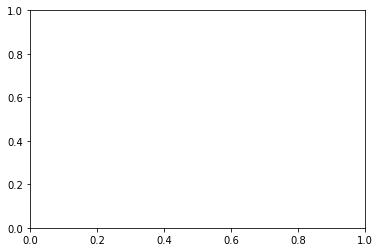

In [249]:
fig, ax = plt.subplots()

In [250]:
ax.plot(df['year'], df['annual_precip'], marker='o', label='annual precipitation')

In [251]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['year'], df['annual_precip'])
trend_line = intercept + slope * df['year']

In [252]:
ax.plot(df['year'], trend_line, color='r')

In [253]:
ax.set_xlabel('Year')
ax.set_ylabel('Annual Precipitation (inches)')
ax.set_title('Precipitation Trend - Houston, TX 1973-2022')

Text(0.5, 1.0, 'Precipitation Trend - Houston, TX 1973-2022')

In [254]:
ax.legend()

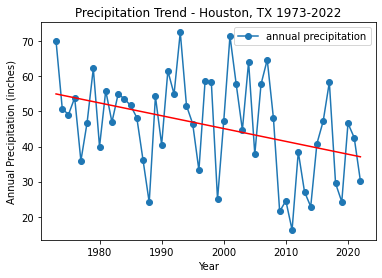

In [255]:
display(fig)